In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
!pip install efficientnet
!pip install annoy

     |████████████████████████████████| 645kB 2.7MB/s 
  Created wheel for annoy: filename=annoy-1.16.3-cp36-cp36m-linux_x86_64.whl size=297364 sha256=6d8e218c760b01d903aa186befa6f25c6f4c78eacc3b3952b2738f9ebd49a37c
  Stored in directory: /root/.cache/pip/wheels/f3/01/54/6ef760fe9f9fc6ba8c19cebbe6358212b5f3b5b0195c0b813f
Successfully built annoy


In [0]:
!git clone https://github.com/PotatoSpudowski/S.I.D.E.git
%cd S.I.D.E

Cloning into 'S.I.D.E'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 48 (delta 12), reused 44 (delta 8), pack-reused 0
Unpacking objects: 100% (48/48), done.
/content/S.I.D.E


In [0]:
import os
import sys
import glob

from tqdm import tqdm

import numpy as np
from skimage import io
import matplotlib.pyplot as plt
sys.path.append('..')
import efficientnet.tfkeras as efn
from annoy import AnnoyIndex
from tensorflow.keras.models import Model
from efficientnet.keras import center_crop_and_resize, preprocess_input
from tensorflow.keras.preprocessing import image
from model.model import *
from index_search.index_search import *
from utils.utils import *

Using TensorFlow backend.


In [0]:
model = get_efficientnet_model('B4')

78856192/78856072 [==============================] - 7s 0us/step


In [0]:
model.summary()

Model: "efficientnet-b4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 380, 380, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 190, 190, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 190, 190, 48) 192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 190, 190, 48) 0           stem_bn[0][0]                    
____________________________________________________________________________________

In [0]:
model = get_efficientnet_feature_extractor('B4')

In [0]:
images = glob.glob('../*.jpg')

In [18]:
images[:5]

['../2008_001866.jpg',
 '../2008_008330.jpg',
 '../2008_004445.jpg',
 '../2008_000195.jpg',
 '../2008_007054.jpg']

In [19]:
%%time
features = extract_image_features(images, model)

100%|██████████| 1000/1000 [03:39<00:00,  4.71it/s]

CPU times: user 3min 30s, sys: 1min 56s, total: 5min 26s
Wall time: 3min 39s


In [20]:
annoy_index = build_annoy_index(features, features[0].shape[0], 1000)

1000it [00:00, 3248.04it/s]


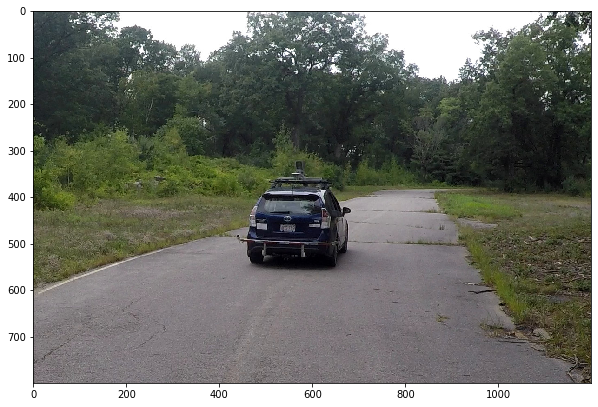

In [21]:
image = io.imread('../test1.jpeg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [0]:
distances = nns_for_images('../test1.jpeg', model, annoy_index, 20)

Similarity score: 1.1399877071380615


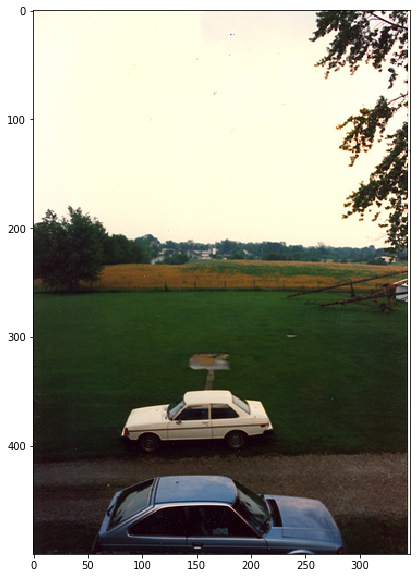

Similarity score: 1.144394040107727


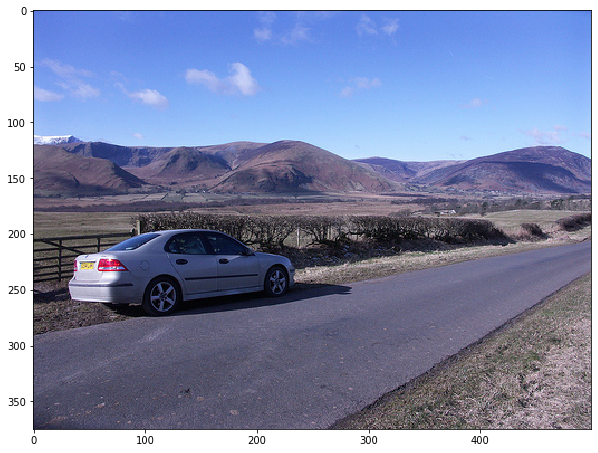

Similarity score: 1.1699155569076538


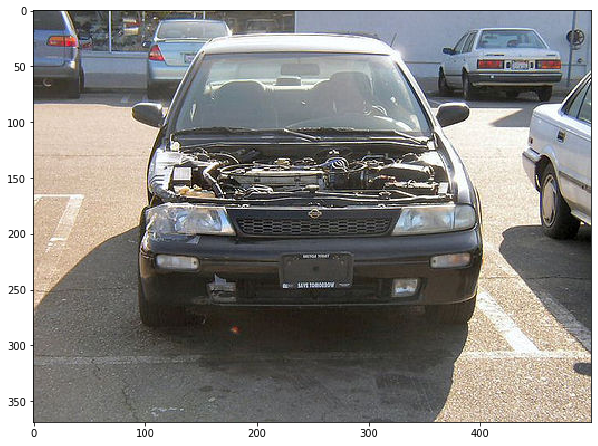

Similarity score: 1.1830755472183228


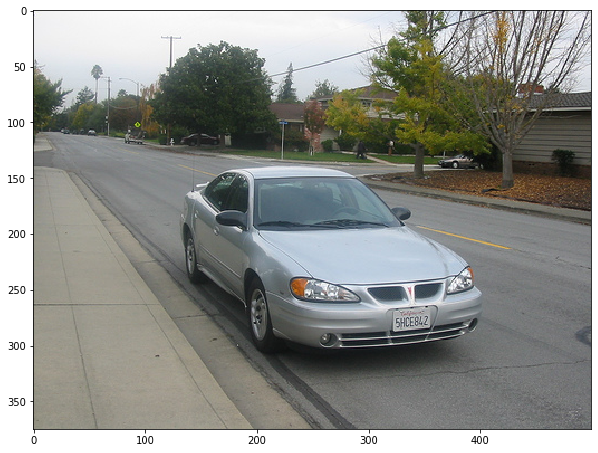

Similarity score: 1.1915966272354126


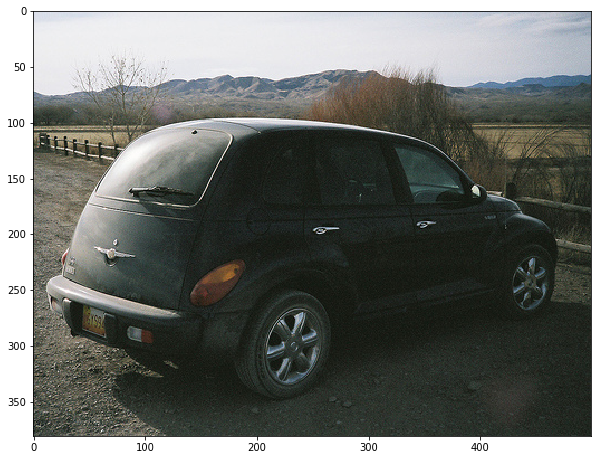

In [23]:
for i in range(5):
    image = io.imread(images[distances[0][i]])
    print("Similarity score: "+str(distances[1][i]))

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.show()

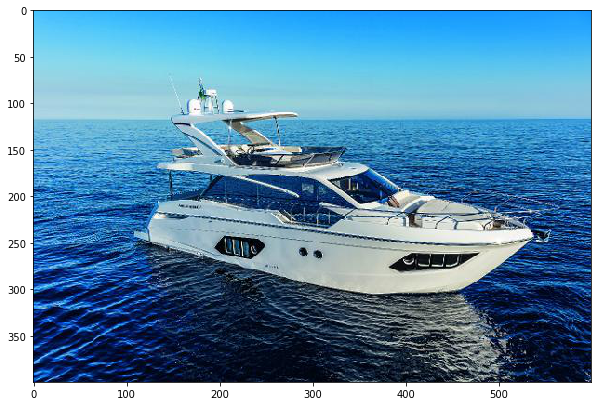

In [24]:
image = io.imread('../test2.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [0]:
distances = nns_for_images('../test2.jpg', model, annoy_index, 20)

Similarity score: 1.0611379146575928


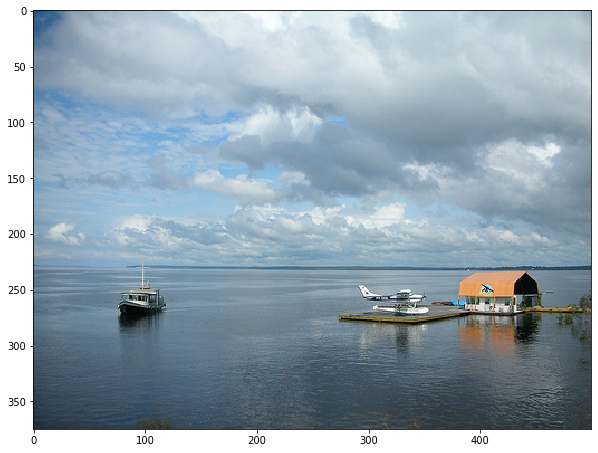

Similarity score: 1.0653581619262695


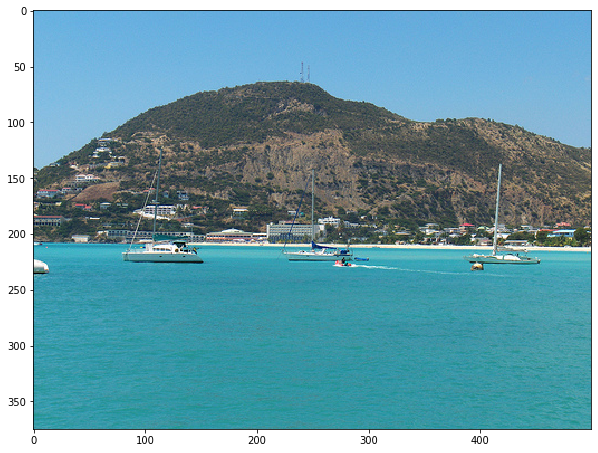

Similarity score: 1.0726685523986816


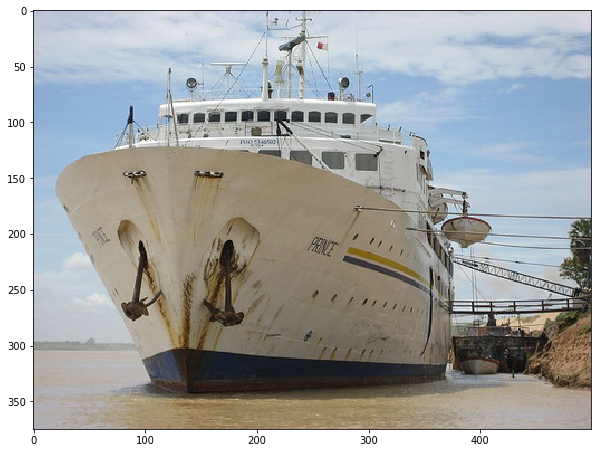

Similarity score: 1.0820722579956055


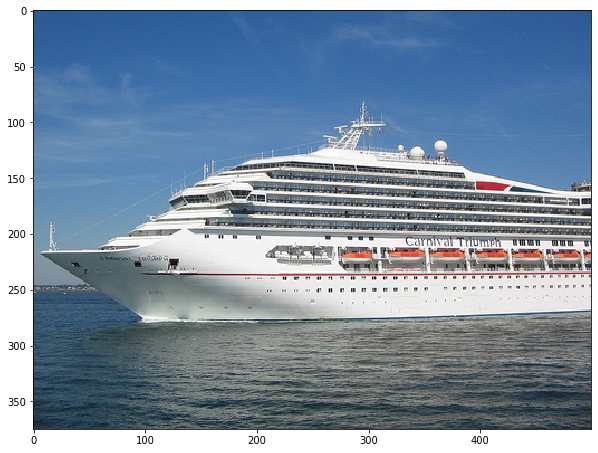

Similarity score: 1.0853550434112549


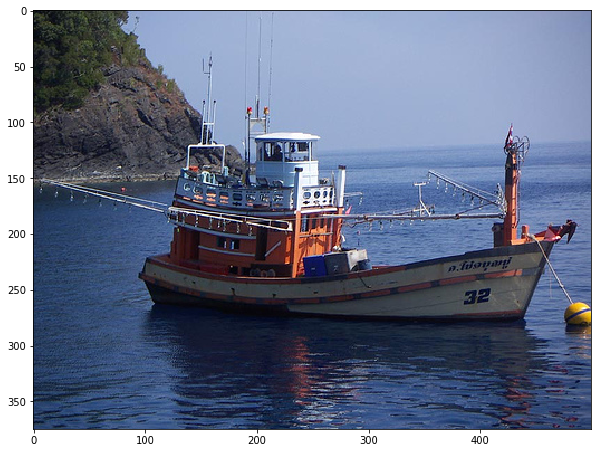

In [26]:
for i in range(5):
    image = io.imread(images[distances[0][i]])
    print("Similarity score: "+str(distances[1][i]))

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.show()